<a href="https://www.kaggle.com/code/junedism/exploratory-data-analysis-video-games-sales?scriptVersionId=116411654" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
plt.rcParams["axes.grid"] = True
plt.rcParams["grid.linestyle"] = "--"

# Data Description
This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com.<br>So it must be noted that in this notebook when we mention video games, we are refering to **video games with more than 100,000 sales**.

Fields include

- Rank - Ranking of overall sales
- Name - The games name
- Platform - Platform of the games release (i.e. PC,PS4, etc.)
- Year - Year of the game's release
- Genre - Genre of the game
- Publisher - Publisher of the game
- NA_Sales - Sales in North America (in millions)
- EU_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Global_Sales - Total worldwide sales.

# Data Understanding
Lets begin with loading our data then start to do basic exploration to get better understanding of the data

In [2]:
# Loading the data
vgsales_df = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

In [3]:
# Show some sample of the data
vgsales_df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
690,692,LEGO Marvel Super Heroes,X360,2013.0,Action,Warner Bros. Interactive Entertainment,1.24,0.85,0.0,0.21,2.30
12073,12075,Classic Action: Devilish,DS,2005.0,Misc,505 Games,0.06,0.00,0.0,0.00,0.07
14011,14013,World of Goo,PC,2008.0,Puzzle,2D Boy,0.00,0.03,0.0,0.01,0.04
14228,14231,Angler's Club: Ultimate Bass Fishing 3D,3DS,2011.0,Sports,D3Publisher,0.00,0.03,0.0,0.00,0.03
6734,6736,Littlest Pet Shop: Country Friends,DS,2009.0,Simulation,Electronic Arts,0.23,0.00,0.0,0.02,0.25


In [4]:
# Take a look at statistical summary of our data
vgsales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
# The info function lets us see the properties of each field
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Findings
> As we can see from the given information above, there are some null values in our data. We're going to drop the records with null value.<br>
> On the other hand, the `Year` field has wrong data type so we need to change it to the right data type.

In [6]:
# Dropping records with null value
vgsales_df.dropna(how="any", inplace=True)

### Notes
> Now that we have removed some of the games from our data, we need to reset the `Rank` field value to compensate the missing rank caused by data removal process we did earlier <br>
> Some might argue that this isn't necessary since the rank would be still ordered from high to low acording to the sales. But we'll do that for the data neatiness sake

In [7]:
# Make sure the data is ordered by Global_Sales
vgsales_df.sort_values(by="Global_Sales", ascending=False, inplace=True)

# Reset the index
vgsales_df.reset_index(drop=True, inplace=True)

# Rearrange the Rank field
vgsales_df["Rank"] = np.arange(1, len(vgsales_df) + 1)

In [8]:
# Change Year field to int data type
vgsales_df["Year"] = vgsales_df["Year"].astype(int)

In [9]:
# Field properties after the operations
vgsales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16291 entries, 0 to 16290
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  int64  
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [10]:
vgsales_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8146.000000,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4702.950953,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4073.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8146.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12218.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16291.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<hr>

Now that we have the basic information about our data, let's dig deeper to find another piece of information about our data.<br>We can start with searching for unique value in each nominal field, in our case, those are `Name`, `Platform`, `Genre`, and `Publisher` field. <br>But before that we need to make sure that our data contains no duplicates.

In [11]:
# Check for duplicates
print(f"Number of duplicates : {vgsales_df[vgsales_df.columns.difference(['Rank'])].duplicated().sum()}")

Number of duplicates : 0


Looks like we have no duplicated data, then we're clear to going forward.

In [12]:
# Unique values
print(f'''
Number of unique Game : {vgsales_df["Name"].nunique()}
Number of unique Platform : {vgsales_df["Platform"].nunique()}
Number of unique Genre : {vgsales_df["Genre"].nunique()}
Number of unique Publisher : {vgsales_df["Publisher"].nunique()}
''')


Number of unique Game : 11325
Number of unique Platform : 31
Number of unique Genre : 12
Number of unique Publisher : 576



In [13]:
# Number of Games by Platform
vgsales_df["Platform"].value_counts()

DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [14]:
# Number of Games by Publisher
vgsales_df["Publisher"].value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
iWin                               1
CPG Products                       1
Imax                               1
Wizard Video Games                 1
Boost On                           1
Name: Publisher, Length: 576, dtype: int64

### Findings
> There are actually less unique games compared to the total of record, that could be because some games are multiplatform. We need to take a closer look at it. <br>
> Most of the games are released on the Nintendo DS platform followed by Playstation 2 with a tiny gap.

Let's take a closer look at the data to see if the data does contain multiplatform games.

In [15]:
# Show video game data that has the same name
multiplatform_vg = vgsales_df[vgsales_df.duplicated(["Name"], keep=False)]
multiplatform_vg.sort_values(by="Name").head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1256,1257,007: Quantum of Solace,X360,2008,Action,Activision,0.82,0.52,0.01,0.14,1.49
2964,2965,007: Quantum of Solace,Wii,2008,Action,Activision,0.30,0.29,0.01,0.07,0.67
8946,8947,007: Quantum of Solace,DS,2008,Action,Activision,0.11,0.01,0.00,0.01,0.14
1736,1737,007: Quantum of Solace,PS3,2008,Action,Activision,0.43,0.52,0.02,0.20,1.16
13968,13969,007: Quantum of Solace,PC,2008,Action,Activision,0.01,0.01,0.00,0.00,0.03


In [16]:
# Number of multiplatform video games
multiplatform_vg["Name"].nunique()

2716

### Findings
> Looks like we does have multiplatform games. From 11325 video games, 2716 of them are multiplatform games.

## Let's create some visuals!
Say we want to know the frequency distribution of released video games across the year

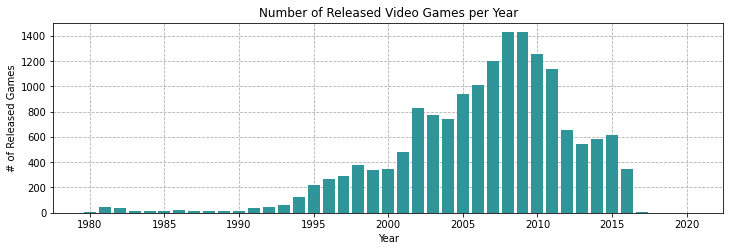

In [17]:
# Get the data
vg_year = vgsales_df["Year"].value_counts()
year = vg_year.keys()
value = vg_year.values

# Plot the data
fig = plt.figure(figsize=(12,3.5))
plt.grid(visible=True, ls='--', zorder=0)
plt.bar(year, value, zorder=5, color="#2F9599")
plt.title("Number of Released Video Games per Year")
plt.xlabel("Year")
plt.ylabel("# of Released Games")
plt.show()

### Findings
> The amount of released video games are relatively low and stable from the 80s through early 90s, and keep rising afterward until reaching the peak at 2008 and 2009. After which point the amount are decreasing from time to time.

We'll keep exploring the data to see if we can find the reason behind the declining of released video games from the peak point.<br>To achieve it, we're going to compare the released video games barplot to another variable plot, we'll start with the Global Sales variable.

In [18]:
sales_sum = vgsales_df.groupby(by=["Year"]).sum().reset_index()
sales_avg = vgsales_df.groupby(by=["Year"]).mean().reset_index()

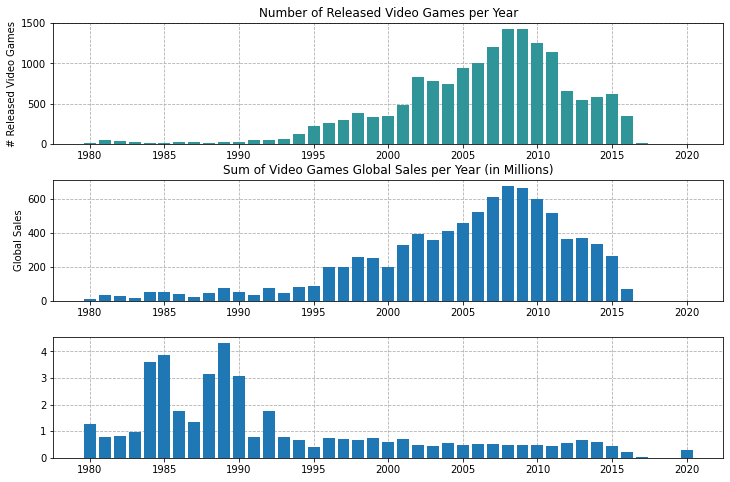

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(12, 8))
fig.subplots_adjust(hspace=.3)

ax[0].bar(year, value, zorder=5, color="#2F9599")
ax[0].set_ylabel("# Released Video Games")
ax[0].set_title("Number of Released Video Games per Year")

ax[1].bar(sales_sum["Year"], sales_sum["Global_Sales"], zorder=5)
ax[1].set_ylabel("Global Sales")
ax[1].set_title("Sum of Video Games Global Sales per Year (in Millions)")

ax[2].bar(sales_avg["Year"], sales_avg["Global_Sales"], zorder=5)

plt.show()

### Findings
> 

In [20]:
#duplicate.sort_values(by="Name")